# **Overview.**

Hass Consulting Company  is a real estate leader with over 25 years of experience. They want to understand the factors that affect housing prices.  Using the  details of the house I will create a model that would allow the company to accurately predict the sale of prices upon being provided with the house details eg number of bedrooms, the size of the living area, availability of a view,longtitude and latitude etc..

# Metric of success

Creating Regression model using different techniques that will predict  the price of house given the number of bedrooms,size of living area,size of basement,number of floors,year it was built,year it was renovated,the location, availability waterfront and view,the grading of the house the size above and the condition of the house. I will create the model using Multiple linear regression,Quantile regression,Lasso regression,ridge regression and Elastic net. Then I will choose the best model.

# Data understanding

In [ ]:
## import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import KFold,GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
### import the data
data=pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')

In [ ]:
## viewing the data
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
## the number rows and columns
data.shape

(21613, 20)

In [ ]:
### the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

# Data cleaning and manipulation.

In [ ]:
## missing  values
data.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
### duplicates
data.duplicated().value_counts()

False    21610
True         3
dtype: int64

From our data we found  3 duplicates, and dropped them

In [ ]:
## dropping the duplicated
data.drop_duplicates().head(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [ ]:
### drop the id column
data=data.drop('id',1)

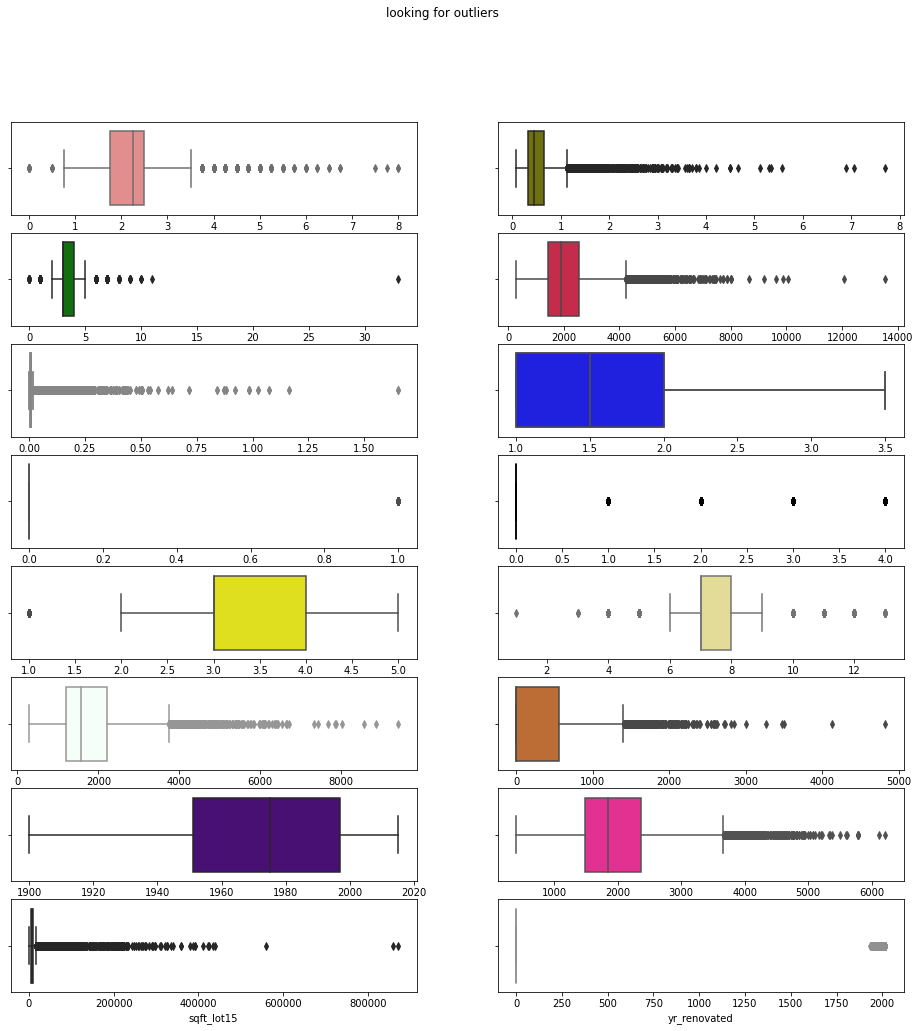

In [ ]:
### looking for  outliers
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10),(ax11,ax12),(ax13,ax14),(ax15,ax16))=plt.subplots(8,2,figsize=(16,16))
plt.suptitle('looking for outliers')
sns.boxplot(data['bathrooms'],ax=ax1,color='lightcoral')
sns.boxplot(data['price'],ax=ax2,color='olive')
sns.boxplot(data['bedrooms'],ax=ax3,color='green')
sns.boxplot(data['sqft_living'],ax=ax4,color='crimson')
sns.boxplot(data['sqft_lot'],ax=ax5,color='pink')
sns.boxplot(data['floors'],ax=ax6,color='blue')
sns.boxplot(data['sqft_lot'],ax=ax5,color='pink')
sns.boxplot(data['floors'],ax=ax6,color='blue')
sns.boxplot(data['waterfront'],ax=ax7,color='grey')
sns.boxplot(data['view'],ax=ax8,color='black')
sns.boxplot(data['condition'],ax=ax9,color='yellow')
sns.boxplot(data['grade'],ax=ax10,color='khaki')
sns.boxplot(data['sqft_above'],ax=ax11,color='mintcream')
sns.boxplot(data['sqft_basement'],ax=ax12,color='chocolate')
sns.boxplot(data['yr_built'],ax=ax13,color='indigo')
sns.boxplot(data['sqft_living15'],ax=ax14,color='deeppink')
sns.boxplot(data['sqft_lot15'],ax=ax15,color='olive')
sns.boxplot(data['yr_renovated'],ax=ax16,color='linen')
plt.show()


In [ ]:
#### dealing with outlier
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1
df=data[~((data<(q1-1.5*IQR))|(data>(q3+1.5*IQR))).any(axis=1)]
df.shape

(14931, 19)

In [ ]:
#### look our clean  data
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


# Exploratory Data Analysis.

In [ ]:
### statistical description
df[['price','bedrooms','sqft_living','sqft_lot','floors','waterfront','view','grade','sqft_basement','sqft_living15','sqft_lot15']].describe()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_basement,sqft_living15,sqft_lot15
count,1.493100e+04,14931.000000,14931.000000,14931.000000,14931.000000,14931.0,14931.0,14931.000000,14931.000000,14931.000000,14931.000000
mean,4.383980e+05,3.261938,1814.005090,6988.593798,1.471268,0.0,0.0,7.380082,228.951778,1796.650660,6868.036300
std,1.800721e+05,0.772803,614.579034,3355.886692,0.547917,0.0,0.0,0.804876,353.231478,507.192667,2987.930774
min,8.200000e+04,2.000000,560.000000,520.000000,1.000000,0.0,0.0,6.000000,0.000000,620.000000,651.000000
25%,3.000000e+05,3.000000,1350.000000,4690.000000,1.000000,0.0,0.0,7.000000,0.000000,1430.000000,4800.000000
50%,4.050000e+05,3.000000,1740.000000,7020.000000,1.000000,0.0,0.0,7.000000,0.000000,1710.000000,7172.000000
75%,5.470000e+05,4.000000,2210.000000,8925.000000,2.000000,0.0,0.0,8.000000,450.000000,2090.000000,8649.500000
max,1.120000e+06,5.000000,4200.000000,19141.000000,3.500000,0.0,0.0,9.000000,1400.000000,3640.000000,17550.000000


Text(0.5, 1.0, 'relationship between price and sqft_living')

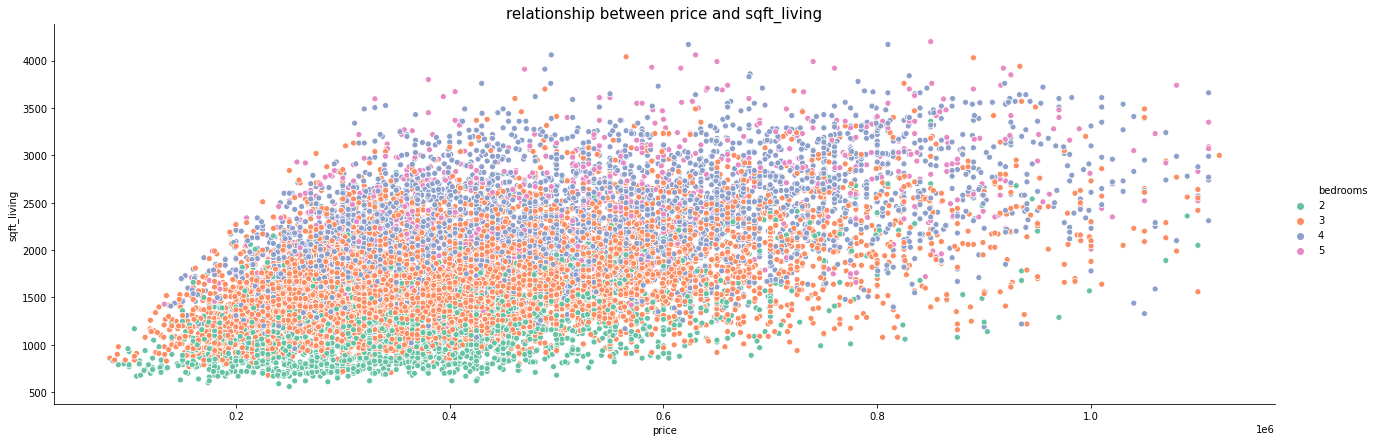

In [ ]:
####Relationship betweeen  bedroom sqft of living area and price
sns.set_style=('dark_grid')
sns.relplot(x='price',y='sqft_living',hue='bedrooms',data=df,palette='Set2',height=6,aspect=3)
plt.title('relationship between price and sqft_living',fontsize=(15))

From the graph, we can see that most of the 2 bedroom house have less living area in sqft and are cheaper, compared to 3,4 and 5 bedroom houses. hence  we can conclude that the price increases with the size of the bedroom and the size of the living area

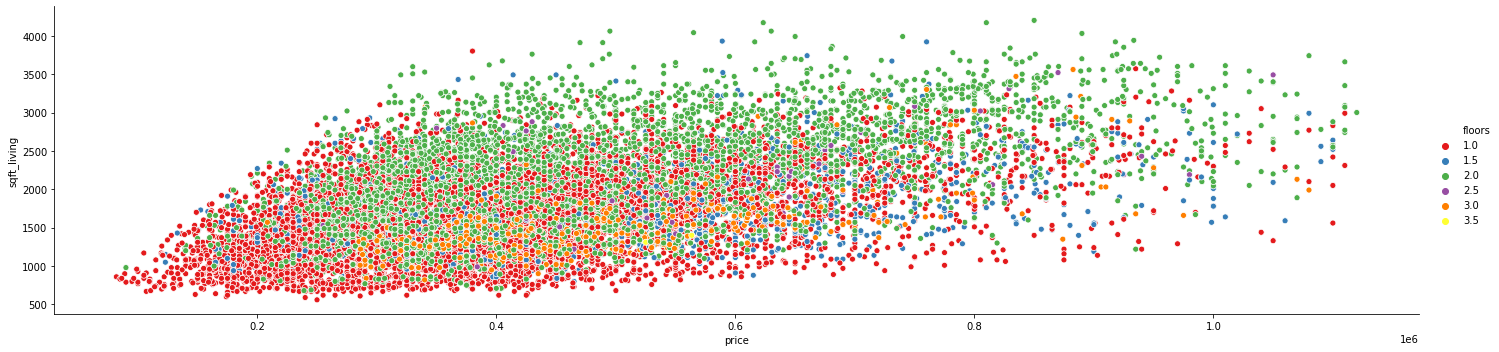

In [ ]:
##### relationship of floors,sqf_lot and price
sns.relplot(x='price',y='sqft_living',hue='floors',palette='Set1',height=5,aspect=4,data=df)

Most of the 1 floor houses are cheaper and have less sqftin the living area. 

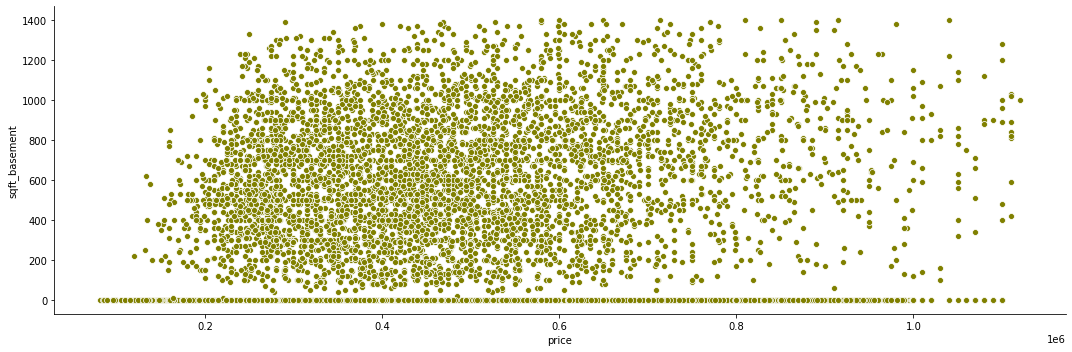

In [ ]:
### the sqft_basement and the price
sns.relplot(x='price',y='sqft_basement',data=df,aspect=3,color='olive',markers="+",)

In [ ]:
##### correlation
cor=df.drop(['waterfront','view','yr_renovated','lat','zipcode','long'],axis=1).corr()
cor

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
price,1.000000,0.239214,0.340767,0.514465,-0.085519,0.227441,0.084215,0.527261,0.408152,0.200186,-0.012176,0.447504,-0.095735
bedrooms,0.239214,1.000000,0.443816,0.614615,0.205092,0.128898,0.029109,0.289933,0.485829,0.242182,0.159318,0.413615,0.196653
bathrooms,0.340767,0.443816,1.000000,0.669337,-0.088711,0.524475,-0.157639,0.584361,0.592870,0.155143,0.604099,0.515211,-0.091677
sqft_living,0.514465,0.614615,0.669337,1.000000,0.164760,0.317437,-0.068415,0.622565,0.831448,0.324253,0.351198,0.727137,0.150074
sqft_lot,-0.085519,0.205092,-0.088711,0.164760,1.000000,-0.416436,0.151206,-0.032188,0.114661,0.091440,-0.106939,0.200412,0.882197
floors,0.227441,0.128898,0.524475,0.317437,-0.416436,1.000000,-0.302576,0.472503,0.518531,-0.330550,0.552402,0.254738,-0.423910
condition,0.084215,0.029109,-0.157639,-0.068415,0.151206,-0.302576,1.000000,-0.189171,-0.189246,0.203177,-0.405011,-0.131915,0.153056
grade,0.527261,0.289933,0.584361,0.622565,-0.032188,0.472503,-0.189171,1.000000,0.637885,-0.002877,0.509145,0.603934,-0.023650
sqft_above,0.408152,0.485829,0.592870,0.831448,0.114661,0.518531,-0.189246,0.637885,1.000000,-0.255985,0.473741,0.710195,0.101779
sqft_basement,0.200186,0.242182,0.155143,0.324253,0.091440,-0.330550,0.203177,-0.002877,-0.255985,1.000000,-0.195550,0.055950,0.087821


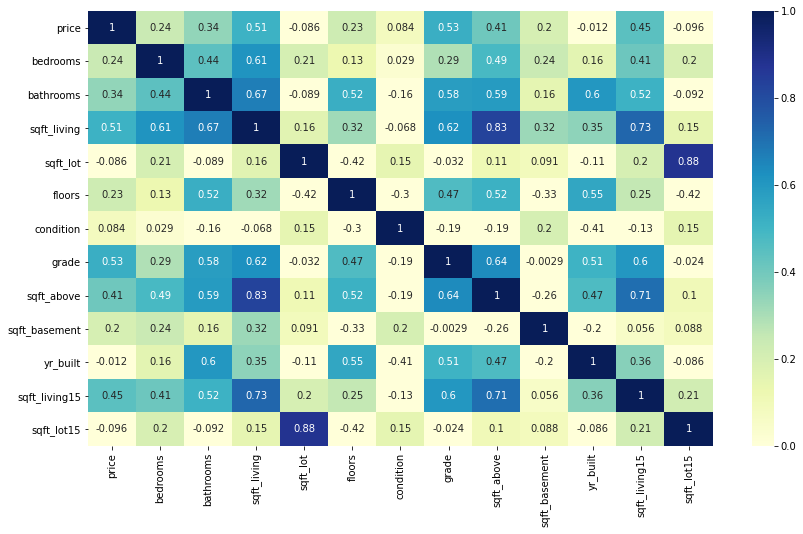

In [ ]:
fig,plt.figure(figsize=(14,8))
sns.heatmap(cor,annot=True,cmap="YlGnBu",vmax=1,vmin=0)

Price have a high correlation with the size of living area(sqft_living), the size above(sqft above), the grade of the house(grade),

# **Predictive Analysis**

## **Multiple regression**

In [ ]:
##dividing the data into features and label\
x=df.drop('price',1)
y=df['price'].values

In [ ]:
### correlation of the features
cor_x=df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade','sqft_above','sqft_basement','yr_built','sqft_living15','sqft_lot15']].corr()
cor_x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
bedrooms,1.000000,0.443816,0.614615,0.205092,0.128898,0.029109,0.289933,0.485829,0.242182,0.159318,0.413615,0.196653
bathrooms,0.443816,1.000000,0.669337,-0.088711,0.524475,-0.157639,0.584361,0.592870,0.155143,0.604099,0.515211,-0.091677
sqft_living,0.614615,0.669337,1.000000,0.164760,0.317437,-0.068415,0.622565,0.831448,0.324253,0.351198,0.727137,0.150074
sqft_lot,0.205092,-0.088711,0.164760,1.000000,-0.416436,0.151206,-0.032188,0.114661,0.091440,-0.106939,0.200412,0.882197
floors,0.128898,0.524475,0.317437,-0.416436,1.000000,-0.302576,0.472503,0.518531,-0.330550,0.552402,0.254738,-0.423910
condition,0.029109,-0.157639,-0.068415,0.151206,-0.302576,1.000000,-0.189171,-0.189246,0.203177,-0.405011,-0.131915,0.153056
grade,0.289933,0.584361,0.622565,-0.032188,0.472503,-0.189171,1.000000,0.637885,-0.002877,0.509145,0.603934,-0.023650
sqft_above,0.485829,0.592870,0.831448,0.114661,0.518531,-0.189246,0.637885,1.000000,-0.255985,0.473741,0.710195,0.101779
sqft_basement,0.242182,0.155143,0.324253,0.091440,-0.330550,0.203177,-0.002877,-0.255985,1.000000,-0.195550,0.055950,0.087821
yr_built,0.159318,0.604099,0.351198,-0.106939,0.552402,-0.405011,0.509145,0.473741,-0.195550,1.000000,0.362947,-0.086088


In [ ]:
#### checking multicolinnearity
## we use VIF 
vif=pd.DataFrame(np.linalg.inv(cor_x),index=cor_x.index,columns=cor_x.columns)
vif

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
bedrooms,1.713842,-0.335501,1.268994e+00,-0.077840,-0.006097,-0.044364,0.228314,-2.265363e+00,-1.308088e+00,0.120402,0.087574,-0.142262
bathrooms,-0.335501,2.973884,-2.111151e+00,0.041038,-0.660511,-0.204831,-0.196518,1.240423e+00,2.188982e-01,-1.095396,-0.126945,0.154830
sqft_living,1.267100,-2.112343,-5.484421e+13,-0.803838,-2.859581,0.548253,-0.160351,5.366922e+13,3.152190e+13,2.414461,-0.761609,-1.111027
sqft_lot,-0.077840,0.041038,-8.010172e-01,4.681920,0.449081,-0.003737,0.097747,2.511294e-01,4.041776e-01,0.065071,0.090085,-3.872629
floors,-0.006097,-0.660511,-2.865598e+00,0.449081,2.727852,0.099588,-0.329821,2.041127e+00,2.236664e+00,-0.432212,0.309277,0.600045
condition,-0.044364,-0.204831,5.496774e-01,-0.003737,0.099588,1.259678,-0.022468,-5.263998e-01,-3.850080e-01,0.526062,0.112285,-0.131794
grade,0.228314,-0.196518,-1.507791e-01,0.097747,-0.329821,-0.022468,2.222934,-6.235444e-01,-2.801572e-01,-0.370307,-0.564687,-0.032719
sqft_above,-2.268984,1.229651,5.366922e+13,0.252599,2.031899,-0.525260,-0.614087,-5.251940e+13,-3.084657e+13,-2.112621,-0.912756,1.147560
sqft_basement,-1.308786,0.217848,3.152190e+13,0.406947,2.236237,-0.384287,-0.274954,-3.084657e+13,-1.811733e+13,-0.971512,-0.040200,0.783815
yr_built,0.120402,-1.095396,2.423629e+00,0.065071,-0.432212,0.526062,-0.370307,-2.121593e+00,-9.767817e-01,2.241013,-0.042117,-0.314028


When checking the VIF, any vif score should be removed, but form our data we dont have any feature with above 5.

In [ ]:
#### normalization of the features
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [ ]:
### split the data into train and test data
from sklearn.model_selection import KFold
fold=KFold(n_splits=5)
count=1
for train_index,test_index in fold.split(x):
  print('training model',str(count))
x_train,x_test=x[train_index],x[test_index]
y_train,y_test=y[train_index],y[test_index ]

In [ ]:
### dimension reduction using PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

In [ ]:
#### multiple linear regression
from sklearn.linear_model import LinearRegression
multi=LinearRegression()
multi.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
## making prediction
y_pred=multi.predict(x_test)

In [ ]:
### checking the accuracy and mean_squared_error
from sklearn.metrics import mean_squared_error,accuracy_score
print('mean squared error',mean_squared_error(y_test,y_pred))
print('multiple regression score',multi.score(x_test,y_test))

mean squared error 15875605585.653824
multiple regression score 0.5165496836521617


In [ ]:
### Calculting the  residual
residual=np.subtract(y_pred,y_test)
residual.mean()
print(pd.DataFrame(residual).describe())

                   0
count    2986.000000
mean     3388.741097
std    125973.858221
min   -705379.383796
25%    -70256.013075
50%     20659.539282
75%     93245.027060
max    361330.075153


Text(0, 0.5, 'predicted values')

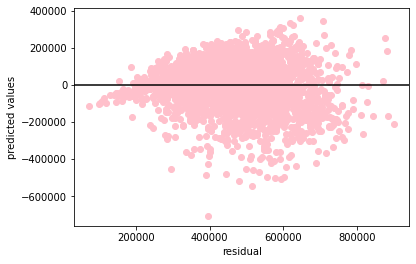

In [ ]:
### plotting the residual plot
plt.scatter(y_pred,residual,color='pink')
plt.axhline(y=residual.mean(),color='black')
plt.xlabel('residual')
plt.ylabel('predicted values')

In [ ]:
#### heteroskedasticity testing using barlette formular... 
### we are testing if the variance for the data points is  same
import scipy as sp
test,pvalue = sp.stats.bartlett(y_pred, residual)
### calculating the chi square
ddf=len(y_pred)-1
prob=1-pvalue

critical=sp.stats.chi2.ppf(prob,ddf)

if test>critical:
  print('variance is unequal, the ,model should be redone')
else:
  print('variance is homogenous,model is good to go ')

variance is homogenous,model is good to go 


In [ ]:
#### the cofficient of the model
coff=multi.coef_
coef_multi=pd.DataFrame(coff,index=['pca 1','pca 2','pca 3','pca 4'],
                        columns=['coeffients']).sort_values(by='coeffients',
                                                            ascending=False)
coef_multi

,coeffients
pca 3,64594.466184
pca 1,29823.988109
pca 2,-17037.863854
pca 4,-37420.205790


## Ridge regression


In [ ]:
## import libraries
from sklearn.linear_model import Ridge
from  sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
ridge=Ridge(normalize=True)
params={'alpha':np.logspace(-5,5,1)}
hyp=GridSearchCV(estimator=ridge,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,refit=True,cv=10)
#### search for the best paramaters
hyp.fit(x_train,y_train)
print(hyp.best_params_)
{'alpha': 0.00001}
abs(hyp.best_score_)

{'alpha': 1e-05}


18000527070.301018

In [ ]:
## We have gotten our alpha as 0.00001
ridge=Ridge(normalize=True,alpha=0.00001)
### we fit our model using our new ridge
ridge.fit(x_train,y_train)
#### finding the  the predicted values
y_pred=ridge.predict(x_test)
### accessing the mean_ squared  error for the model
print('mean squared error',mean_squared_error(y_test,y_pred))
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE',RMSE)
print('ridge score',ridge.score(x_test,y_test))
print('r2',r2_score(y_test,y_pred))

mean squared error 15875605585.653824
RMSE 125998.43485398468
ridge score 0.5165489628351521
r2 0.5165489628351521


In [ ]:
coff2=ridge.coef_
coef_ridge=pd.DataFrame(coff2,index=['pca 1','pca 2','pca 3','pca 4'],
                        columns=['coeffients']).sort_values(by='coeffients',
                                                            ascending=False)
coef_ridge

,coeffients
pca 3,64593.820246
pca 1,29823.689872
pca 2,-17037.693477
pca 4,-37419.831592


### Lasso Regression

In [ ]:
 ## we find our best parameter
 from sklearn.linear_model import Lasso
 lasso=Lasso(normalize=True)
 params={'alpha':np.arange(0.1,2,0.2)}
 grid=GridSearchCV(lasso,params,scoring='r2')

In [ ]:
## finding the best 
print(grid.best_params_)

{'alpha': 0.1}


In [ ]:
##  fitting the  lasso model using a parameter of 0.1
lasso=Lasso(normalize=True,alpha=0.1)
lasso.fit(x_train,y_train)
## prediction
y_pred=lasso.predict(x_test)

In [ ]:
### assessing the model prformance
print('lasso score',lasso.score(x_test,y_test))
print('mean squared error',mean_squared_error(y_test,y_pred))


lasso score 0.5165394715805268
mean squared error 15875917260.266886


In [ ]:
# the coeffients of lasso 
coff3=lasso.coef_
coef_lasso=pd.DataFrame(coff3,index=['pca 1','pca 2','pca 3','pca 4'],
                        columns=['coeffients']).sort_values(by='coeffients',
                                                            ascending=False)
coef_lasso

,coeffients
pca 3,64586.459596
pca 1,29818.974207
pca 2,-17030.559881
pca 4,-37409.569274


## **Elastic net**

In [ ]:
## elastic net model
from sklearn.linear_model import ElasticNet
elastic=ElasticNet(normalize=True)
net=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
#We will now fit our model and display the best parameters and the best results we can get with that setup. 
net.fit(x_train,y_train)
print(net.best_params_)
abs(net.best_score_)

{'alpha': 1e-05, 'l1_ratio': 0.8}


18006677876.148903

In [ ]:
### fitting our model using
elastic=ElasticNet(alpha=0.00001,l1_ratio=0.8,normalize=True)
elastic.fit(x_train,y_train)
## doing our prediction
y_pred=elastic.predict(x_test)
### assessing our model
print('elastic net score',elastic.score(x_test,y_test))
print('mean_squared error',mean_squared_error(y_test,y_pred))

elastic net score 0.514609213168032
mean_squared error 15939303247.428827


In [ ]:
#### the coeff
coff4=elastic.coef_
coef_=pd.DataFrame(coff4,index=['pca 1','pca 2','pca 3','pca 4'],
                        columns=['coeffients']).sort_values(by='coeffients',
                                                            ascending=False)
coef_

,coeffients
pca 3,63087.309714
pca 1,29128.116993
pca 2,-16640.325885
pca 4,-36547.094843


Quantile regression

In [ ]:
###  performing a quantile regression
from sklearn.metrics import r2_score
import statsmodels.regression.quantile_regression as Q_reg
quantiles = [0.01, 0.05, 0.50, 0.95 , 0.99]
# Creating a function that gets the model and the coffient
def Qreg(q):
   #Modeling 
   mod = Q_reg.QuantReg(y_train,x_train).fit(q=q)  
   #Get the coefficients and the lower and upper bounds
   coefs = pd.DataFrame()
   coefs['param'] = mod.params
   modi=pd.DataFrame(mod.conf_int())
   coefs = pd.concat([coefs,modi],axis=1)
   coefs['q'] = q
   coefs.columns = ['params','lower_bound','upper_bound','quantile']
   return coefs
Qreg_coefs = pd.DataFrame()
for q in quantiles:
    coefs = Qreg(q)
    Qreg_coefs = pd.concat([Qreg_coefs,coefs])

# Get the R-squared for Q=0.5
q = 0.5
y_pred = Q_reg.QuantReg(y_train,x_train).fit(q=q).predict(x_test)
r2 = r2_score(y_test,y_pred)
print('R2 score is {}'.format(r2) ) 


R2 score is -5.078591854097248


In [ ]:
from statsmodels.regression.quantile_regression import QuantReg
